<a href="https://colab.research.google.com/github/leedy40259/Ybigta_summer/blob/main/0720_Stats_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 필요한 모듈 임포트
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Ybigta_summer/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q1. 통계분석 - 신뢰구간

In [4]:
# 결측치 제거
print(np.isnan(df.Age).sum())
df.Age.fillna(df.Age.mean(), inplace = True)
print(np.isnan(df.Age).sum())
print(df.Age.isnull().sum())

177
0
0


In [5]:
# 중앙
df.Age.median()

29.69911764705882

In [6]:
# 분산
df.Age.var()

169.0523999372108

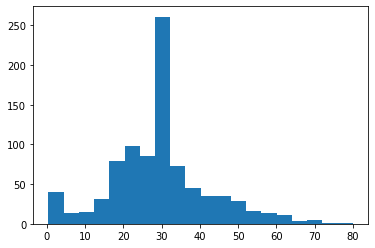

In [7]:
# 모양과 이상치 유무
plt.hist(df.Age, bins = 20)
plt.show()

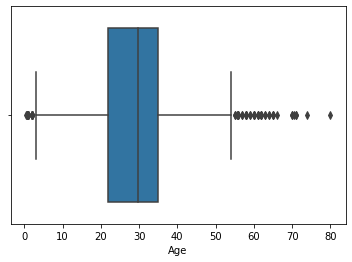

In [8]:
# boxplot으로 모양 한번 더 확인
sns.boxplot(data = df, x = df.Age)
# outlier지만 age가 현실적으로 가능한 숫자이므로 제거하지 않음

In [9]:
# 신뢰구간 선정
# alpha = 0.95

In [10]:
# 구간 계산
from scipy import stats
# n < 30일 때는 t distribution의 interval 함수 사용
# n > 30일 때는 normal distribution의 interval 함수 사용
stats.t.interval(0.95, df = 29, loc = np.mean(df.Age), scale = stats.sem(df.Age))

(28.808248544730905, 30.589986749386735)

In [11]:
# 구간 해석
# 전체 age 데이터의 평균이 28.8x - 30.6x 사이에 있을 확률이 95%

### Q1. 통계분석 - 가설검정

In [ ]:
# 가설
# 대립가설: 살아남은 사람들의 평균 나이와 그렇지 못한 사람들의 평균 나이에 차이가 없을 것이다.
# 귀무가설: 살아남은 사람들의 평균 나이와 그렇지 못한 사람들의 평균 나이에 차이가 있을 것이다.

In [ ]:
# 검정 선택 후 가정 확인
# t 검정, 유의수준(p-value:0.05)
# 귀무가설이 맞다는 전제 하에 매우 적은 표본 통계값이 나온다는 것을 증명해야 함
df_survived = df[df.Survived == 1]
df_dead = df[df.Survived == 0]

In [ ]:
# 통계량 계산 (평균 나이 계산)
mean_s = np.mean(df_survived.Age)
mean_d = np.mean(df_dead.Age)
std_s = np.std(df_survived.Age)
std_d = np.std(df_dead.Age)

In [ ]:
stats.ttest_ind_from_stats(mean_s, std_s, df_survived.shape[0], mean_d, std_d, df_dead.shape[0])

Ttest_indResult(statistic=-2.088909409240897, pvalue=0.036999777112807365)

In [ ]:
# 결과 해석
# p value < 0.05이므로 귀무가설 기각, 대립가설 채택 

### Q2. 회귀분석

In [12]:
# 데이터 가져오기
reviews = pd.read_excel('/content/drive/MyDrive/Ybigta_summer/reviews.xlsx')
x = reviews['kakao'].values
y = reviews['naver'].values
reviews

,Unnamed: 0,kakao,naver
0,카라멘야,4.1,4.46
1,라구식당,4.0,4.48
2,파이홀,3.9,4.53
3,고삼이,4.4,4.55
4,맘맘테이블,4.3,4.49
5,카츠업,4.3,4.81
6,미분당,3.9,4.53
7,독수리다방,4.2,4.49
8,타코로코,4.2,4.50
9,복성각,3.3,4.30


In [13]:
# 2차원 array로 만들기
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)


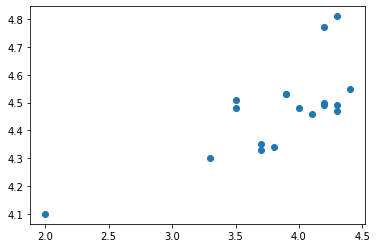

In [ ]:
# 분포 확인
plt.scatter(x, y)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

prediction = model.predict(x)
residual = (y - prediction)

In [16]:
model.score(x, y)

0.54869813315433

In [17]:
print(prediction, residual)

[[4.52456825]
 [4.50340761]
 [4.48224698]
 [4.58805014]
 [4.56688951]
 [4.56688951]
 [4.48224698]
 [4.54572888]
 [4.54572888]
 [4.35528319]
 [4.39760446]
 [4.43992572]
 [4.56688951]
 [4.08019499]
 [4.39760446]
 [4.46108635]
 [4.43992572]
 [4.54572888]] [[-0.06456825]
 [-0.02340761]
 [ 0.04775302]
 [-0.03805014]
 [-0.07688951]
 [ 0.24311049]
 [ 0.04775302]
 [-0.05572888]
 [-0.04572888]
 [-0.05528319]
 [ 0.08239554]
 [-0.10992572]
 [-0.09688951]
 [ 0.01980501]
 [ 0.11239554]
 [-0.12108635]
 [-0.08992572]
 [ 0.22427112]]


In [19]:
# slope
print(model.coef_)

# y-intercept
print(model.intercept_)

# 회귀식
y2 = x*model.coef_ + model.intercept_
print(y2)

[[0.21160631]]
[3.65698236]
[[4.52456825]
 [4.50340761]
 [4.48224698]
 [4.58805014]
 [4.56688951]
 [4.56688951]
 [4.48224698]
 [4.54572888]
 [4.54572888]
 [4.35528319]
 [4.39760446]
 [4.43992572]
 [4.56688951]
 [4.08019499]
 [4.39760446]
 [4.46108635]
 [4.43992572]
 [4.54572888]]


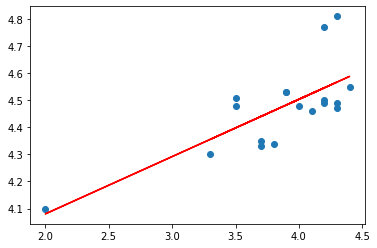

In [20]:
# 회귀식과 scatter plot 비교
plt.scatter(x, y)
plt.plot(x, y2, color = 'red')
plt.show()

### Ordinary Least Squares 재현

In [22]:
# slope
m = (len(x)*(x*y).sum() - x.sum()*y.sum())/(len(x)*(x**2).sum()-(x.sum())**2)
print(m)

# intercept
b = (y.sum()*((x**2).sum()) - x.sum()*(x*y).sum())/(len(x)*(x**2).sum() - (x.sum())**2)
print(b)

0.21160631383472042
3.656982358402971
